In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

In [21]:
dtype_mapping = {
    "objid": str,
    "specobjid": str,
    "ra": float,
    "dec": float,
    "u": float,
    "g": float,
    "r": float,
    "i": float,
    "z": float,
    "class": str,
    "subclass": str,
    "redshift": float
    # Add more columns as needed
}

df = pd.read_csv("../static/assets/sdss_100k_galaxy_form_burst.csv", skiprows=1, dtype=dtype_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  object 
 1   specobjid     100000 non-null  object 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [22]:
df.describe()

,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,...,18.834259,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.116753,0.000179
std,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,...,105.079620,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.100169,0.052189
min,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000002
25%,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,...,19.257783,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.055836,0.000008
50%,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,...,19.763915,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.085850,0.000011
75%,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,...,20.408775,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.135148,0.000015
max,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,...,26.174400,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


In [27]:
df1 = df

In [28]:
df1.replace(-9999.0, np.nan, inplace=True)

# Drop rows with very few missing values
df1.dropna(subset=['u', 'g', 'r', 'i', 'z'], inplace=True)

# Fill missing `petroR50_u` with median value
df1.loc[:, 'petroR50_u'] = df1['petroR50_u'].fillna(df1['petroR50_u'].median())

# Verify missing values are gone
print(df1.isnull().sum())

objid             0
specobjid         0
ra                0
dec               0
u                 0
g                 0
r                 0
i                 0
z                 0
modelFlux_u       0
modelFlux_g       0
modelFlux_r       0
modelFlux_i       0
modelFlux_z       0
petroRad_u        0
petroRad_g        0
petroRad_i        0
petroRad_r        0
petroRad_z        0
petroFlux_u       0
petroFlux_g       0
petroFlux_i       0
petroFlux_r       0
petroFlux_z       0
petroR50_u        0
petroR50_g      143
petroR50_i      121
petroR50_r       59
petroR50_z      911
psfMag_u          0
psfMag_r          0
psfMag_g          0
psfMag_i          0
psfMag_z          0
expAB_u           0
expAB_g           0
expAB_r           0
expAB_i           0
expAB_z           0
class             0
subclass          0
redshift          0
redshift_err      0
dtype: int64


In [29]:
# Convert categorical column into numerical
df1['subclass'] = df1['subclass'].astype('category').cat.codes


In [31]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
scaler = StandardScaler()
df1[num_cols] = scaler.fit_transform(df[num_cols])


In [32]:
df.to_csv("cleaned_data.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

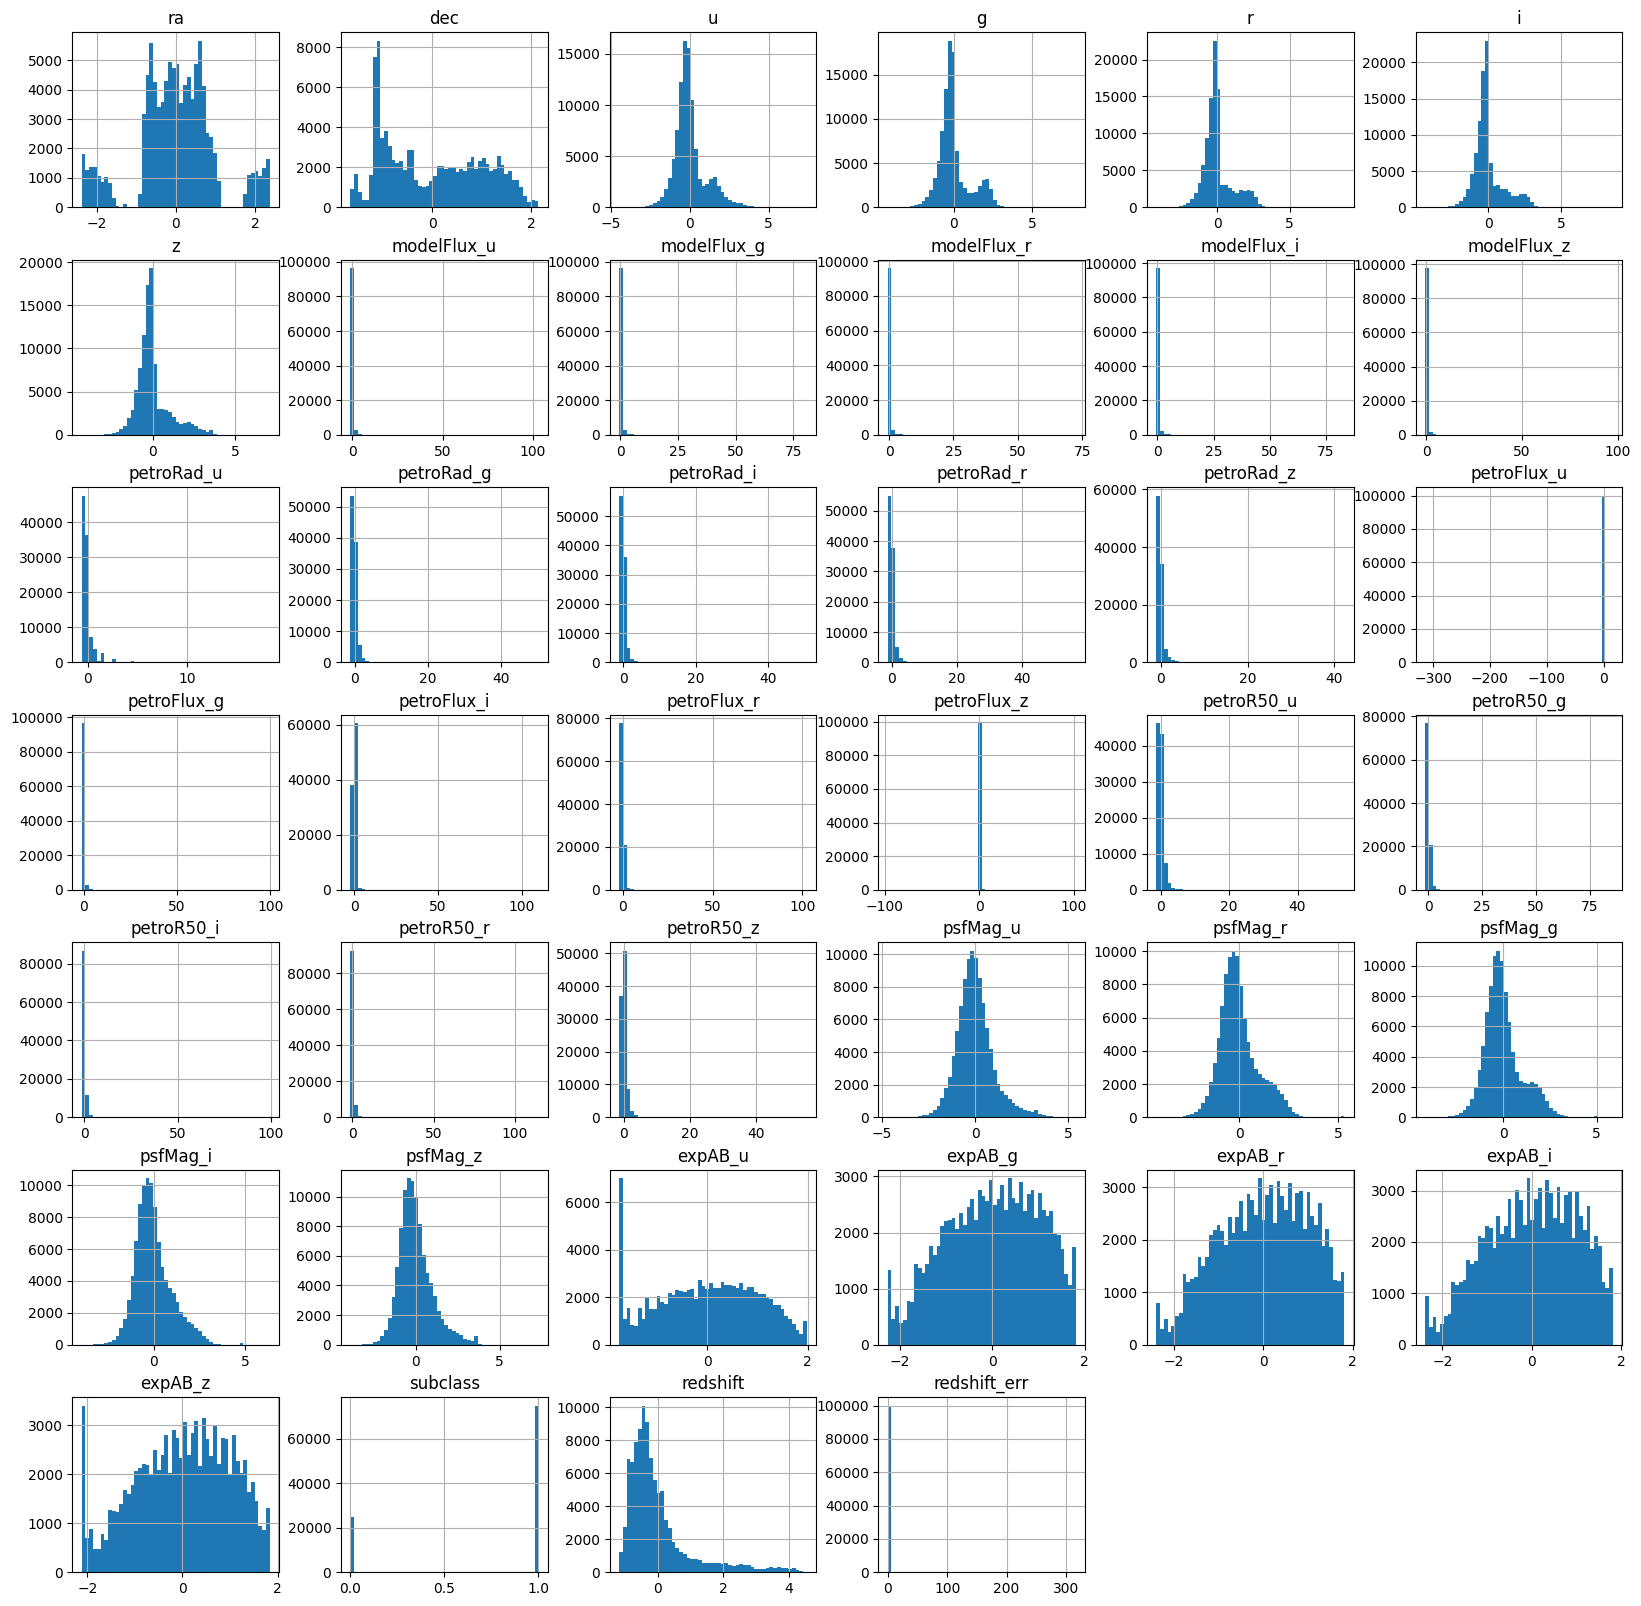

In [37]:
df1.hist(figsize=(20, 20), bins=50)
plt.show()

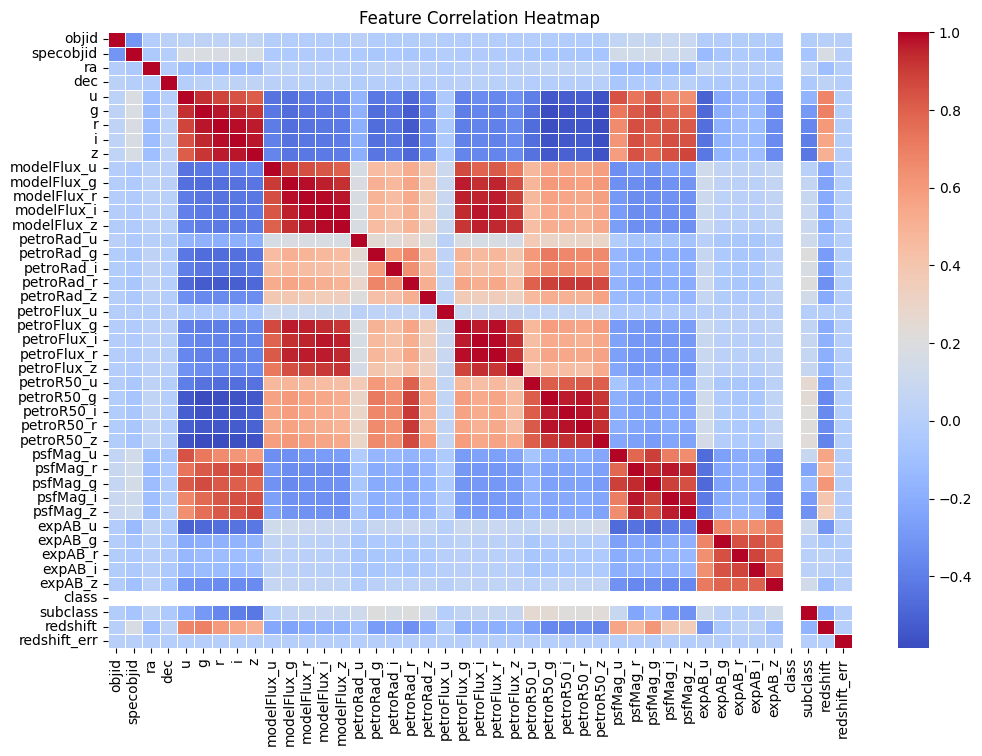

In [50]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Apply label encoding
for col in categorical_cols:
    df1[col] = LabelEncoder().fit_transform(df1[col])

# Now plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()




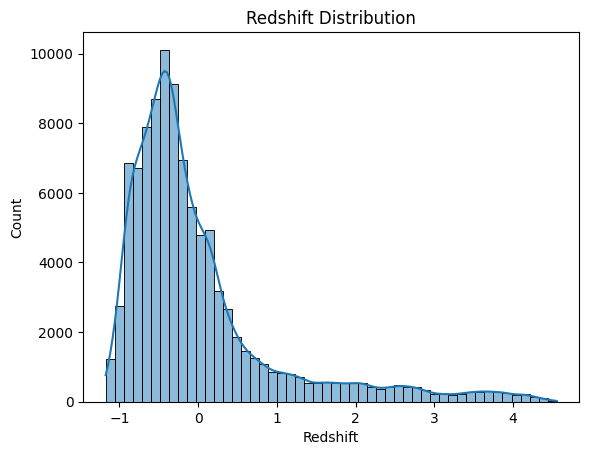

In [39]:
sns.histplot(df1['redshift'], bins=50, kde=True)
plt.title("Redshift Distribution")
plt.xlabel("Redshift")
plt.ylabel("Count")
plt.show()


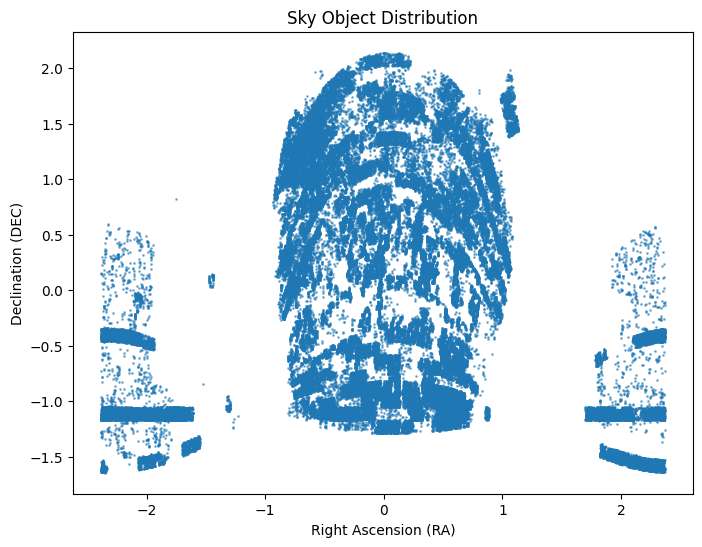

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['ra'], df['dec'], alpha=0.5, s=1)
plt.xlabel("Right Ascension (RA)")
plt.ylabel("Declination (DEC)")
plt.title("Sky Object Distribution")
plt.show()
